# getting the 1km cell geometry for Baden Württemberg 

In [2]:
import pandas as pd 
import os
import geopandas as gpd
import matplotlib.pyplot as plt

gitter is the cell geometry
bw is the geometry of Baden Württemberg

In [3]:
os.chdir("/Users/sophi/Documents/GIS/Inspire")
gitter = gpd.read_file("DE_Gitter_ETRS89_LAEA_1km.shp")

In [8]:
os.chdir("/Users/sophi/Documents/GIS/DEU_adm")
adm1 = gpd.read_file("DEU_adm1.shp")
bw = adm1[adm1["ID_1"]==1]

Chaning to the same coordinate reference system

In [12]:
gitter = gitter.to_crs("EPSG:4326")
bw = bw.to_crs("EPSG:4326")

A spatial join

In [13]:
bw_gitter = gpd.sjoin(gitter, bw, how = "inner")

<AxesSubplot: >

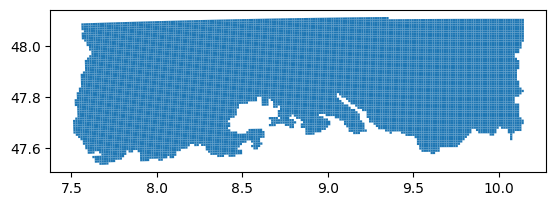

In [6]:
bw_gitter[0:10000].plot()

selecting relevant colums and savng the data 

In [12]:
bw_gitter= bw_gitter[["ID_1km", "geometry"]]
bw_gitter.head()

,ID_1km,geometry
1653,1kmN2716E4145,"POLYGON ((7.66372 47.53262, 7.66331 47.54161, ..."
1654,1kmN2716E4146,"POLYGON ((7.67699 47.53290, 7.67658 47.54190, ..."
1655,1kmN2716E4147,"POLYGON ((7.69025 47.53318, 7.68985 47.54218, ..."
1656,1kmN2716E4148,"POLYGON ((7.70352 47.53346, 7.70312 47.54246, ..."
1820,1kmN2717E4143,"POLYGON ((7.63678 47.54104, 7.63636 47.55004, ..."


In [12]:
os.chdir("/Users/sophi/Documents/GIS")
bw_gitter.to_file("bw_gitter.geojson", driver='GeoJSON')